<a href="https://colab.research.google.com/github/MrF1yn/Hand-Written-Number-Classifier/blob/main/hand_written_number_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

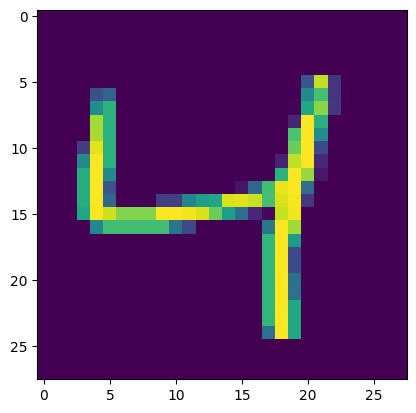

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
X_train = X_train/255

In [ ]:
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=25, validation_split=0.2, callbacks=tensorflow.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True))


Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.2067 - val_accuracy: 0.9727
Epoch 2/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.1795 - val_accuracy: 0.9744
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.2104 - val_accuracy: 0.9717
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.1614 - val_accuracy: 0.9775
Epoch 5/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.1802 - val_accuracy: 0.9753
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.1703 - val_accuracy: 0.9769
Epoch 7/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0073 - accuracy: 0.9981 - val_loss: 0.1757 - val_accuracy:

In [ ]:
model.save('model.h5', save_format='h5')

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 2ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test, y_pred)

0.9655

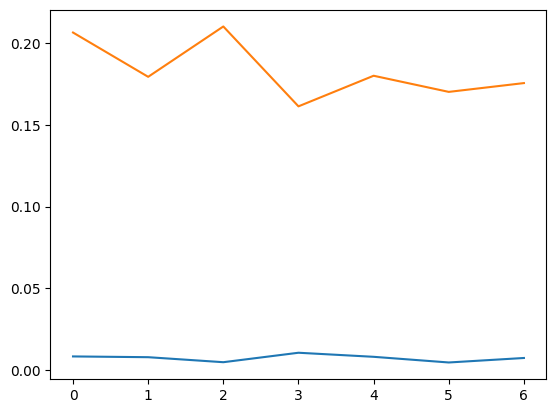

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

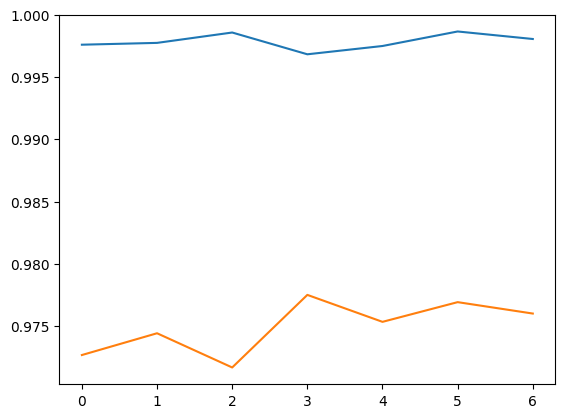

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
index = 0
model.predict(X_test[index].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 117ms/step


array([7])

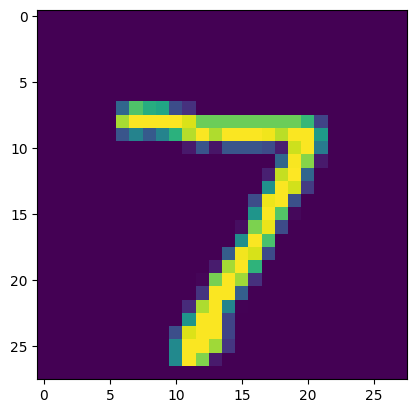

In [ ]:
plt.imshow(X_test[index])